In [ ]:
import os
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.utils.np_utils import to_categorical
import math
import shutil

Using TensorFlow backend.


In [ ]:
dataset_dir = 'flowers-recognition/flowers/'

In [ ]:
number_of_elem = 500
dataset_to_use = []
count_of_each_class =[]
dataset = os.listdir(dataset_dir)
for i in dataset:
    dataset_sub = os.path.join(dataset_dir,i)
    dataset_items = os.listdir(dataset_sub)
    count = np.count_nonzero(dataset_items)
    
    if not (count < number_of_elem):
        print(i)
        dataset_to_use.append(i)
        count_of_each_class.append(count)
        
        
print(np.count_nonzero(dataset_to_use))

daisy
dandelion
rose
sunflower
tulip
5


In [ ]:
new_dataset = 'flowers-recognition/smaller-dataset'
if not os.path.exists(new_dataset):
    os.mkdir(new_dataset)
test = os.path.join(new_dataset, 'test')
train = os.path.join(new_dataset, 'train')
val = os.path.join(new_dataset, 'validation')
if not os.path.exists(test):
    os.mkdir(test)
if not os.path.exists(train):
    os.mkdir(train)
if not os.path.exists(val):
    os.mkdir(val)

In [ ]:
minimum = min(count_of_each_class)
train70 = 500
val20 = 100
test10 = 100
print(train70, val20, test10)



for i in dataset_to_use:
    
    dataset_complt = os.path.join(dataset_dir,i)
    items= os.listdir(dataset_complt)
    count = np.count_nonzero(items)
    train_i = os.path.join(train, i)
    test_i = os.path.join(test,i)
    val_i = os.path.join(val, i)
    
    if not os.path.exists(train_i):
        os.mkdir(train_i)
    if not os.path.exists(val_i):
        os.mkdir(val_i)
    if not os.path.exists(test_i):
        os.mkdir(test_i)
        
    x=0
    print("Runing for ", i)
    for j in items:
        src = os.path.join(dataset_complt,j)
        if x < (train70):
            dst = os.path.join(train_i,j)
            #print(dst)
            shutil.copyfile(src,dst)
            x+=1
        elif x < (train70+val20):
            dst = os.path.join(val_i,j)
            #print(dst)
            shutil.copyfile(src,dst)
            x+=1
        elif x < (train70+val20+test10):
            dst = os.path.join(test_i,j)
            #print(dst)
            shutil.copyfile(src,dst)
            x+=1

        
        
num_classes = (np.count_nonzero(count_of_each_class))

500 100 100
Runing for  daisy
Runing for  dandelion
Runing for  rose
Runing for  sunflower
Runing for  tulip


In [ ]:
dataset_to_use

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
val_datagen = ImageDataGenerator(rescale=1./255,)



train_generator = train_datagen.flow_from_directory(train, 
                                                    target_size=(300, 300),
                                                    batch_size=30,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
val,
target_size=(300, 300),
batch_size=30,    
class_mode='categorical')


Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


W1216 06:35:10.341872  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1216 06:35:10.393562  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1216 06:35:10.405542  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1216 06:35:10.441534  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.summary()

W1216 06:35:28.258841  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1216 06:35:28.286834  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

W1216 06:35:33.877738  9664 deprecation.py:323] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1216 06:35:34.011228  9664 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
10/10 [==============================] - 46s 5s/step - loss: 9.3860 - acc: 0.1933 - val_loss: 1.7020 - val_acc: 0.1867
Epoch 2/10
10/10 [==============================] - 47s 5s/step - loss: 1.5687 - acc: 0.2900 - val_loss: 2.1084 - val_acc: 0.2345
Epoch 3/10
10/10 [==============================] - 45s 4s/step - loss: 1.6462 - acc: 0.2369 - val_loss: 1.4533 - val_acc: 0.3400
Epoch 4/10
10/10 [==============================] - 46s 5s/step - loss: 1.4036 - acc: 0.3733 - val_loss: 1.3879 - val_acc: 0.4138
Epoch 5/10
10/10 [==============================] - 47s 5s/step - loss: 1.4694 - acc: 0.3133 - val_loss: 1.2668 - val_acc: 0.4400
Epoch 6/10
10/10 [==============================] - 46s 5s/step - loss: 1.4459 - acc: 0.3833 - val_loss: 1.3051 - val_acc: 0.4552
Epoch 7/10
10/10 [==============================] - 46s 5s/step - loss: 1.3750 - acc: 0.3833 - val_loss: 1.7212 - val_acc: 0.3345
Epoch 8/10
10/10 [==============================] - 47s 5s/step - loss: 1.2791 - acc: 0.45

# Accuracy 
## Accuaray at last epoch
#### Training accurary      = 52%
#### Validation accuracy  = 42%
## Highest Accuracy
#### Training accurary      = 55%
#### Validation accuracy  = 51%

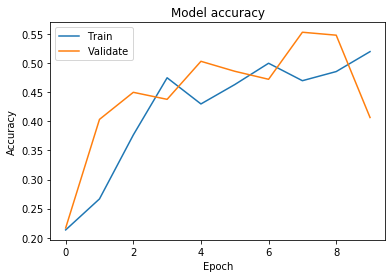

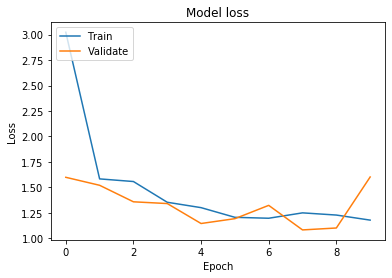

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Overfitting

The model is underfitting because it may still learn


In [ ]:
train_datagen2 = ImageDataGenerator(
rescale=1./255,
rotation_range=80,
width_shift_range=0.3,
height_shift_range=0.3,
shear_range=0.3,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest',)

val_datagen2= ImageDataGenerator(
rescale=1./255,
rotation_range=80,
width_shift_range=0.3,
height_shift_range=0.3,
shear_range=0.3,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest',)


In [ ]:

train_generator2 = train_datagen2.flow_from_directory(train, 
                                                    target_size=(300, 300),
                                                    batch_size=30,
                                                    class_mode='categorical')

validation_generator2 = val_datagen2.flow_from_directory(
val,
target_size=(300, 300),
batch_size=30,    
class_mode='categorical')


Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))


W1216 07:45:47.864834  9064 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1216 07:45:47.892827  9064 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1216 07:45:47.896822  9064 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1216 07:45:47.912822  9064 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1216 07:45:47.994697  9064 deprecation_wrapper.py:119] From C:\Users\D

In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.summary()

W1216 07:45:54.277671  9064 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1216 07:45:54.309663  9064 deprecation_wrapper.py:119] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

In [ ]:
history = model.fit_generator(
train_generator2,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator2,
validation_steps=10)

W1216 07:45:56.144819  9064 deprecation.py:323] From C:\Users\Dr Sher\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
10/10 [==============================] - 49s 5s/step - loss: 11.7626 - acc: 0.1800 - val_loss: 12.7333 - val_acc: 0.2100
Epoch 2/10
10/10 [==============================] - 46s 5s/step - loss: 12.8407 - acc: 0.2033 - val_loss: 13.3947 - val_acc: 0.1690
Epoch 3/10
10/10 [==============================] - 51s 5s/step - loss: 12.8945 - acc: 0.2000 - val_loss: 12.9482 - val_acc: 0.1967
Epoch 4/10
10/10 [==============================] - 45s 5s/step - loss: 13.2085 - acc: 0.1805 - val_loss: 12.3943 - val_acc: 0.2310
Epoch 5/10
10/10 [==============================] - 48s 5s/step - loss: 13.0019 - acc: 0.1933 - val_loss: 12.9482 - val_acc: 0.1967
Epoch 6/10
10/10 [==============================] - 46s 5s/step - loss: 12.6796 - acc: 0.2133 - val_loss: 13.0612 - val_acc: 0.1897
Epoch 7/10
10/10 [==============================] - 48s 5s/step - loss: 12.6796 - acc: 0.2133 - val_loss: 12.7833 - val_acc: 0.2069
Epoch 8/10
10/10 [==============================] - 49s 5s/step - loss: 12.6

# Accuracy after augmentation
## Accuaray at last epoch
#### Training accurary      = 40%
#### Validation accuracy  = 42%
## Highest Accuracy
#### Training accurary      = 48%
#### Validation accuracy  = 45%


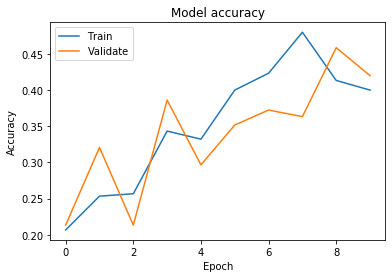

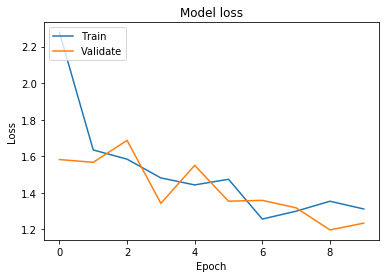

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Overfitting 
No model is because it is still trying to learning 